In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('C:/Users/dipay/Downloads/weather.csv')

In [6]:
dimension=df.shape

In [7]:
dimension


(16743, 14)

In [8]:
structure=df.info()
structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16743 entries, 0 to 16742
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Data.Precipitation         16743 non-null  float64
 1   Date.Full                  16743 non-null  object 
 2   Date.Month                 16743 non-null  int64  
 3   Date.Week of               16743 non-null  int64  
 4   Date.Year                  16743 non-null  int64  
 5   Station.City               16743 non-null  object 
 6   Station.Code               16743 non-null  object 
 7   Station.Location           16743 non-null  object 
 8   Station.State              16743 non-null  object 
 9   Data.Temperature.Avg Temp  16743 non-null  int64  
 10  Data.Temperature.Max Temp  16743 non-null  int64  
 11  Data.Temperature.Min Temp  16743 non-null  int64  
 12  Data.Wind.Direction        16743 non-null  int64  
 13  Data.Wind.Speed            16743 non-null  flo

In [9]:
summary=df.describe()
summary

,Data.Precipitation,Date.Month,Date.Week of,Date.Year,Data.Temperature.Avg Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,Data.Wind.Direction,Data.Wind.Speed
count,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000,16743.000000
mean,0.579090,6.343128,15.650242,2016.018933,56.089112,66.042406,45.642716,18.791316,6.329820
std,0.988057,3.490723,8.923425,0.136294,18.798295,19.787954,18.559263,6.461527,3.494785
min,0.000000,1.000000,1.000000,2016.000000,-27.000000,-19.000000,-35.000000,0.000000,0.000000
25%,0.000000,3.000000,8.000000,2016.000000,44.000000,53.000000,33.000000,15.000000,4.040000
50%,0.190000,6.000000,16.000000,2016.000000,58.000000,68.000000,47.000000,19.000000,5.940000
75%,0.750000,9.000000,24.000000,2016.000000,71.000000,82.000000,60.000000,23.000000,8.080000
max,20.890000,12.000000,31.000000,2017.000000,100.000000,111.000000,88.000000,36.000000,61.100000


In [10]:
df.replace('?',pd.NA,inplace=True)
df.replace('na',pd.NA,inplace=True)

for column in df.columns:
    df[column]=pd.to_numeric(df[column],errors='coerce')
missing_values=df.isnull().sum()
df.fillna(df.mean(),inplace=True)
df.fillna(df.mode().iloc[0],inplace=True)

missing_values_after=df.isnull().sum()
missing_values,missing_values_after

(Data.Precipitation               0
 Date.Full                    16743
 Date.Month                       0
 Date.Week of                     0
 Date.Year                        0
 Station.City                 16743
 Station.Code                 16743
 Station.Location             16743
 Station.State                16743
 Data.Temperature.Avg Temp        0
 Data.Temperature.Max Temp        0
 Data.Temperature.Min Temp        0
 Data.Wind.Direction              0
 Data.Wind.Speed                  0
 dtype: int64,
 Data.Precipitation               0
 Date.Full                    16743
 Date.Month                       0
 Date.Week of                     0
 Date.Year                        0
 Station.City                 16743
 Station.Code                 16743
 Station.Location             16743
 Station.State                16743
 Data.Temperature.Avg Temp        0
 Data.Temperature.Max Temp        0
 Data.Temperature.Min Temp        0
 Data.Wind.Direction              0
 Data.Wind.Sp

In [13]:
continuous_columns=['Data.Temperature.Avg Temp','Data.Temperature.Max Temp']
print(continuous_columns)

['Data.Temperature.Avg Temp', 'Data.Temperature.Max Temp']


C:\Users\dipay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


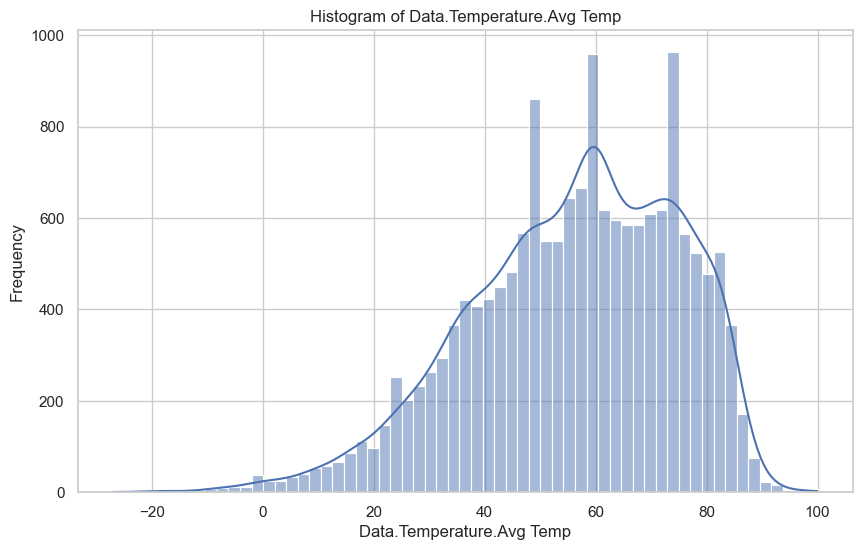

C:\Users\dipay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


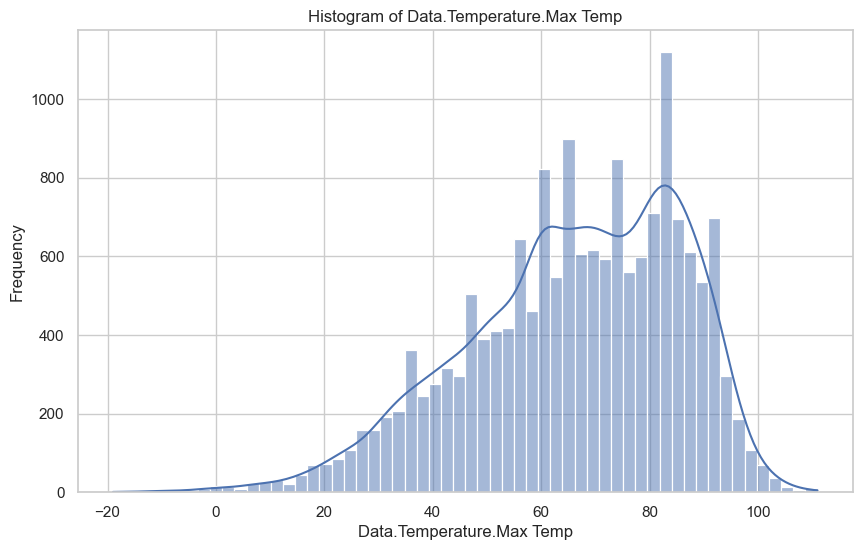

In [14]:
sns.set(style="whitegrid")
for column in continuous_columns:
    plt.figure(figsize=(10,6))
    sns.histplot(df[column],kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

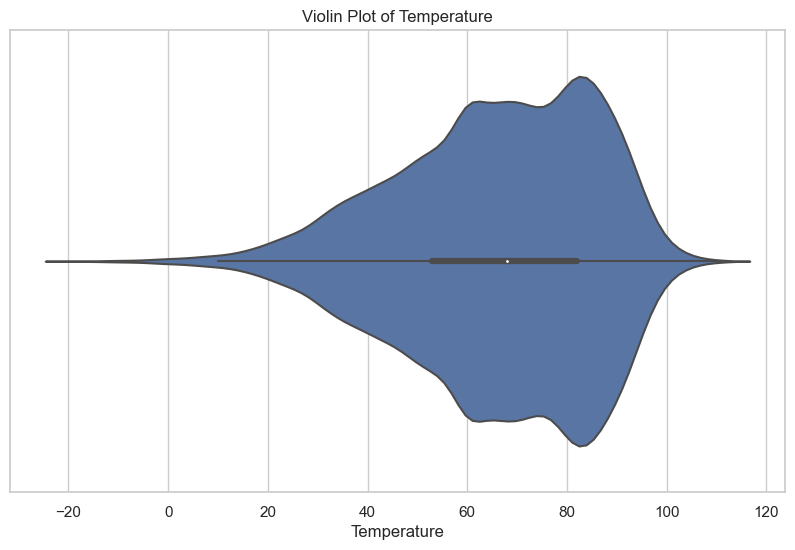

In [15]:
plt.figure(figsize=(10,6))
sns.violinplot(x=df['Data.Temperature.Max Temp'])
plt.title('Violin Plot of Temperature')
plt.xlabel('Temperature')
plt.show()

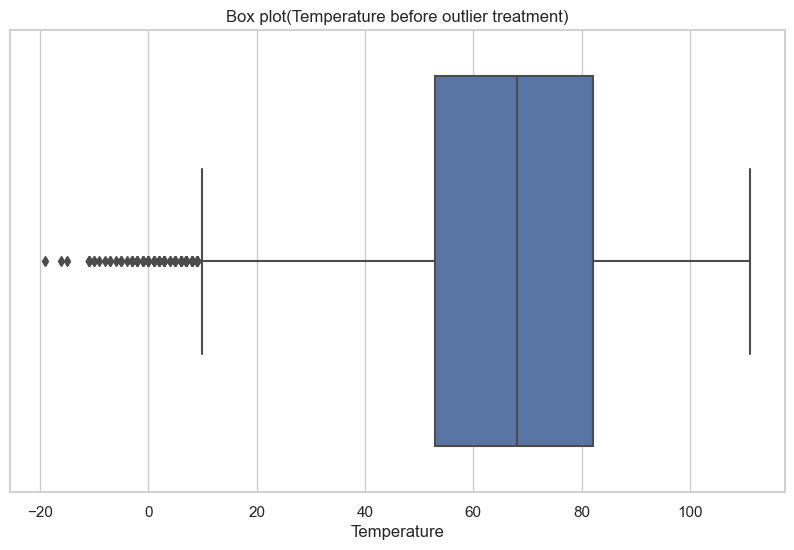

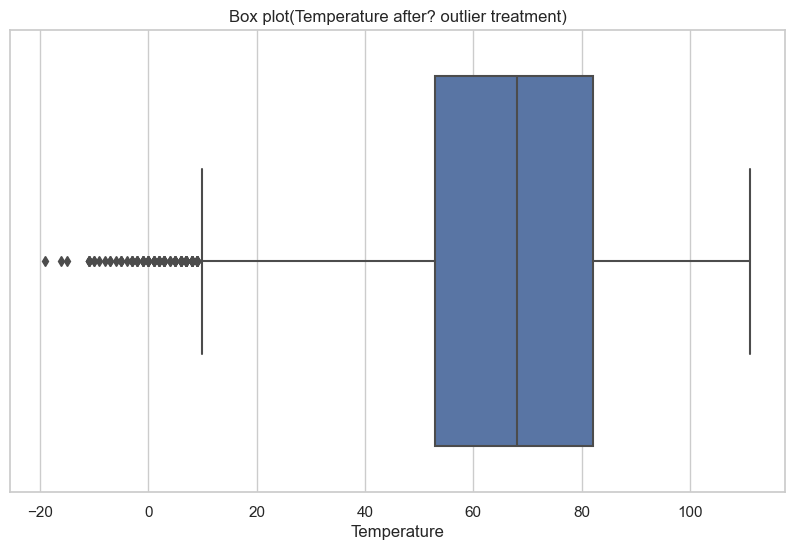

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Data.Temperature.Max Temp'])
plt.title('Box plot(Temperature before outlier treatment)')
plt.xlabel('Temperature')
plt.show()

Q1=df['Data.Temperature.Max Temp'].quantile(0.25)
Q3=df['Data.Temperature.Max Temp'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df['Temperature_C']=df['Data.Temperature.Max Temp'].clip(lower_bound,upper_bound)

plt.figure(figsize=(10,6))
sns.boxplot(x=df['Data.Temperature.Max Temp'])
plt.title('Box plot(Temperature after? outlier treatment)')
plt.xlabel('Temperature')
plt.show()


C:\Users\dipay\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


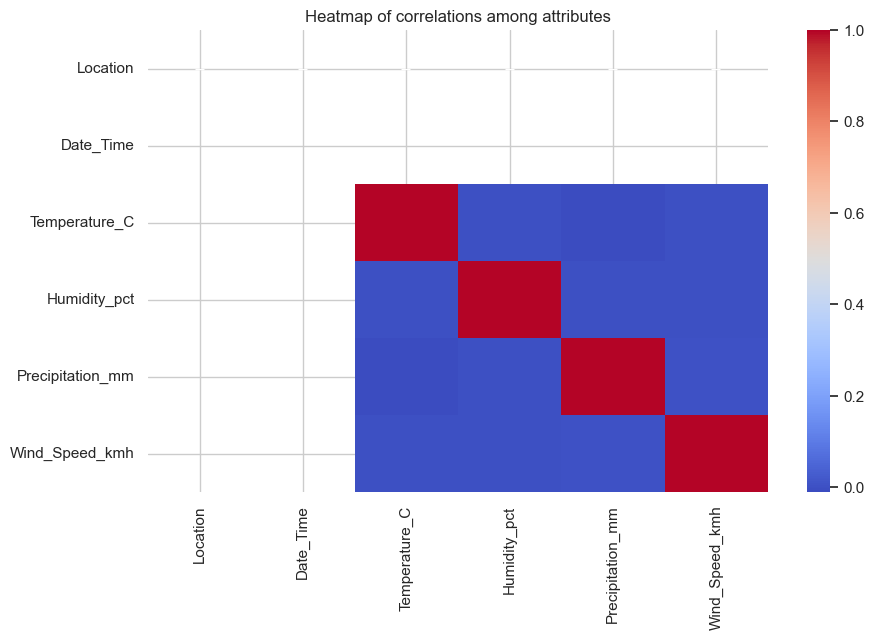

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Heatmap of correlations among attributes')
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
continous_vars=df.select_dtypes(include=['float64','int64']).columns
scaler=StandardScaler()
df[continous_vars]=scaler.fit_transform(df[continous_vars])
df.head()

C:\Users\dipay\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\dipay\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\dipay\anaconda3\Lib\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,NaN,NaN,-0.282872,-1.086704,-0.369580,-0.780749
1,NaN,NaN,-0.417438,-0.098287,1.357527,1.467939
2,NaN,NaN,-0.217315,-1.223830,-0.170329,1.585418
3,NaN,NaN,-1.616337,-0.343301,-0.653298,1.312361
4,NaN,NaN,1.728184,0.743366,1.522608,1.719967


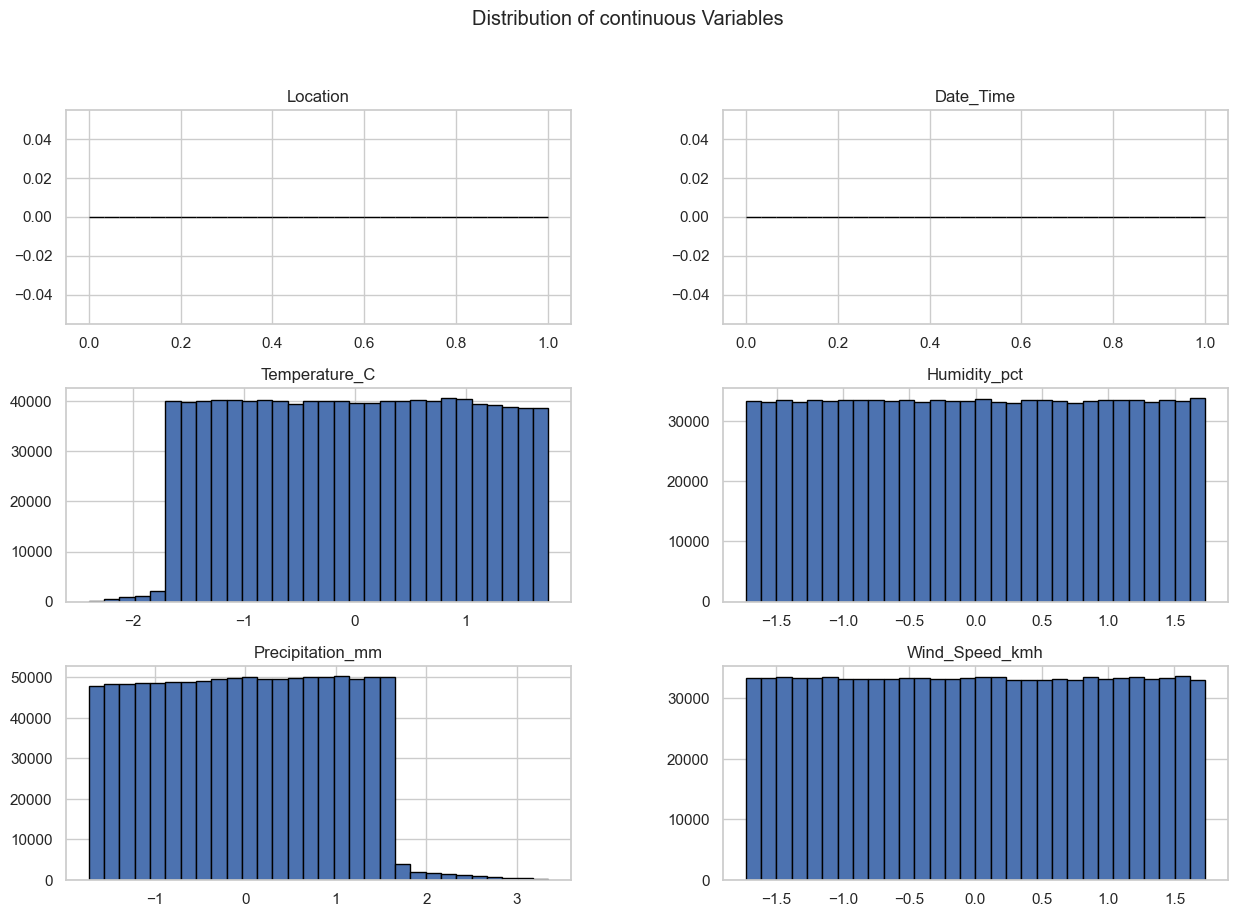

In [31]:
numeric_df=df.select_dtypes(include=['float64','int64'])
numeric_df.hist(bins=30,figsize=(15,10),edgecolor='black')
plt.suptitle('Distribution of continuous Variables')
plt.show()

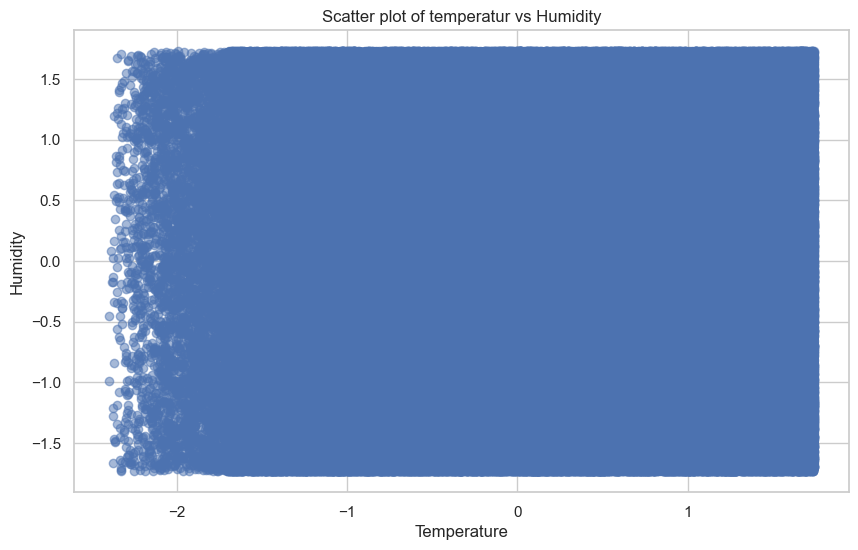

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(df['Temperature_C'],df['Humidity_pct'],alpha=0.5)
plt.title('Scatter plot of temperatur vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


df = pd.read_csv('C:/Users/dipay/Downloads/weather.csv')  


features = df[['Data.Precipitation', 'Data.Wind.Direction', 'Data.Wind.Speed', 
               'Data.Temperature.Max Temp', 'Data.Temperature.Min Temp']]


target = df['Data.Temperature.Avg Temp']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


knn = KNeighborsRegressor(n_neighbors=5) 
knn.fit(X_train_scaled, y_train)


y_pred = knn.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'First 10 Predictions: {y_pred[:10]}')


Mean Squared Error: 1.9731979695431472
First 10 Predictions: [84.6 42.2 60.4 24.4 53.2 69.  18.4 82.  63.6 64.8]
